In [1]:
import numpy as np
import matplotlib.pyplot as plt
import allan_variance as av
import scipy.fft

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 2000x1500 with 6 Axes>,
 array([[<Axes: xlabel='Time / s', ylabel='Amplitude calculated from RMS voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='Time / s', ylabel='Amplitude calculated from peak-to-peak voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>,
         <Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>]],
       dtype=object))

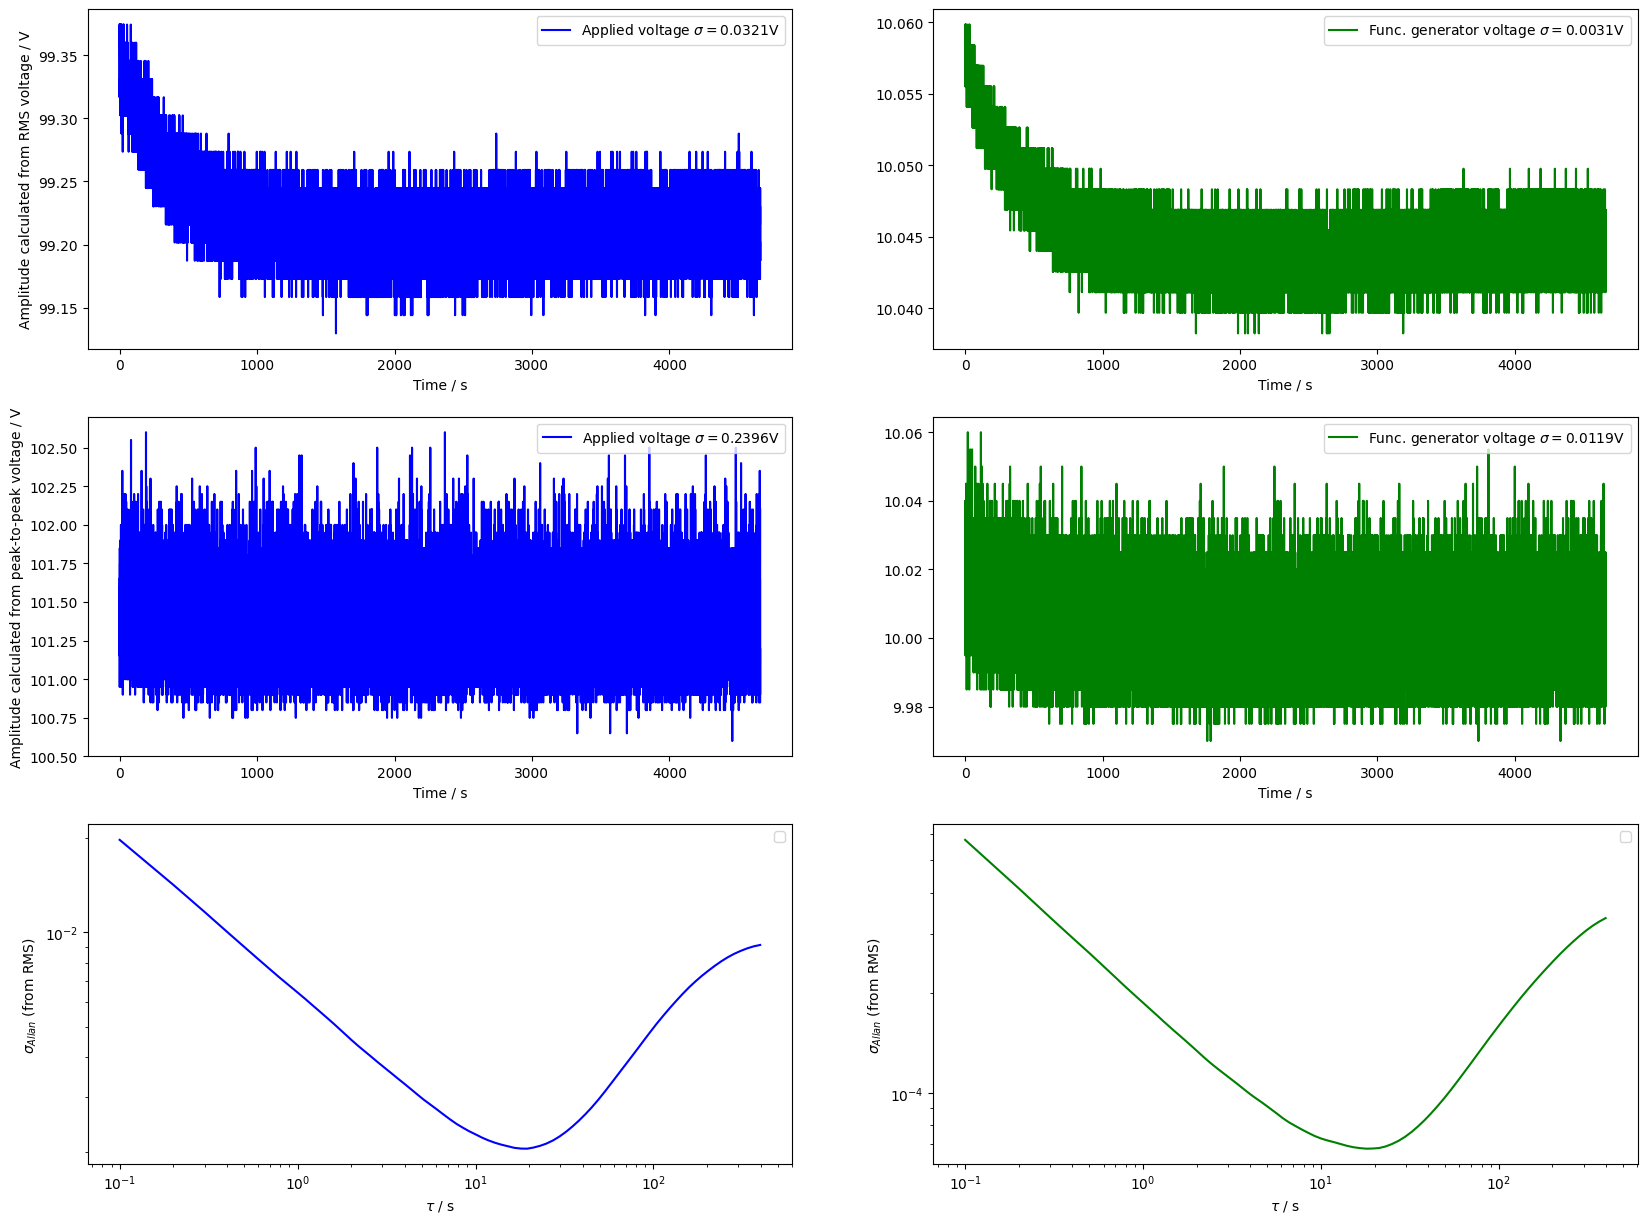

In [2]:
#Load data files
data100V = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\scope_log_20241002_RFStab_100V_.txt',skiprows = 1,delimiter = ',')
#100V had - monitor 500mv/div, generator 5V/div, 10us / div

datas = [data100V]



#Create subplot figure of dimension datas:



def make_stab_figure(dataset):
    fig,ax = plt.subplots(3,2,figsize = (20,15))
    rmsmonitor = dataset[:,3]
    rmsgenerator = dataset[:,4]

    ppmonitor = dataset[:,1]
    ppgenerator = dataset[:,2]

    t0 = dataset[0,0]
    ts = dataset[:,0]-t0

    #Calculate standard deviations
    stdRMSmonitor = np.std(144*rmsmonitor)
    stdRMSgenerator = np.std(rmsgenerator*1.44)
    stdPPmonitor = np.std(ppmonitor*50)
    stdPPgenerator = np.std(ppgenerator*0.5)

    #Calculate allan variance
    dt = 1e-1
    tauRMSmonit,avarRMSmonit = av.compute_avar(144*rmsmonitor,dt)
    tauRMSgenerator,avarRMSgenerator = av.compute_avar(rmsgenerator*0.5,dt)


    #Plot all the data
    ax[0,0].plot(ts,rmsmonitor*1.44*100, color = 'b',label = r'Applied voltage $\sigma = {0}$V'.format(np.round(stdRMSmonitor,4)))
    ax[1,0].plot(ts,ppmonitor*50, color = 'b',label = r'Applied voltage $\sigma = {0}$V'.format(np.round(stdPPmonitor,4)))
    ax[0,1].plot(ts,rmsgenerator*1.44,color = 'g',label = r'Func. generator voltage $\sigma = {0}$V'.format(np.round(stdRMSgenerator,4)))
    ax[1,1].plot(ts,ppgenerator*0.5,color = 'g',label = r'Func. generator voltage $\sigma = {0}$V'.format(np.round(stdPPgenerator,4)))
    ax[2,0].plot(tauRMSmonit,np.sqrt(avarRMSmonit),color = 'b')
    ax[2,1].plot(tauRMSgenerator,np.sqrt(avarRMSgenerator),color ='g')
    #Prettify the plot
    ax[0,0].set_ylabel('Amplitude calculated from RMS voltage / V')
    ax[1,0].set_ylabel('Amplitude calculated from peak-to-peak voltage / V')
    for axe in ax[2,:]:
        axe.set_xlabel(r'$\tau$ / s')
        axe.set_ylabel(r'$\sigma_{Allan}$ (from RMS)')
        axe.set_xscale('log')
        axe.set_yscale('log')
    for axes in ax:
        for axe in axes:
            axe.legend(loc = 'upper right')
    for axe in ax[1]:
        axe.set_xlabel ('Time / s')
    for axe in ax[0]:
        axe.set_xlabel ('Time / s')


    return fig,ax
make_stab_figure(data100V)


Clearly there is some heat-up of the func. generator here. Let's add a mask to only keep t > 1000s, so heatup is gone.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 2000x1500 with 6 Axes>,
 array([[<Axes: xlabel='Time / s', ylabel='Amplitude calculated from RMS voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='Time / s', ylabel='Amplitude calculated from peak-to-peak voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>,
         <Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>]],
       dtype=object))

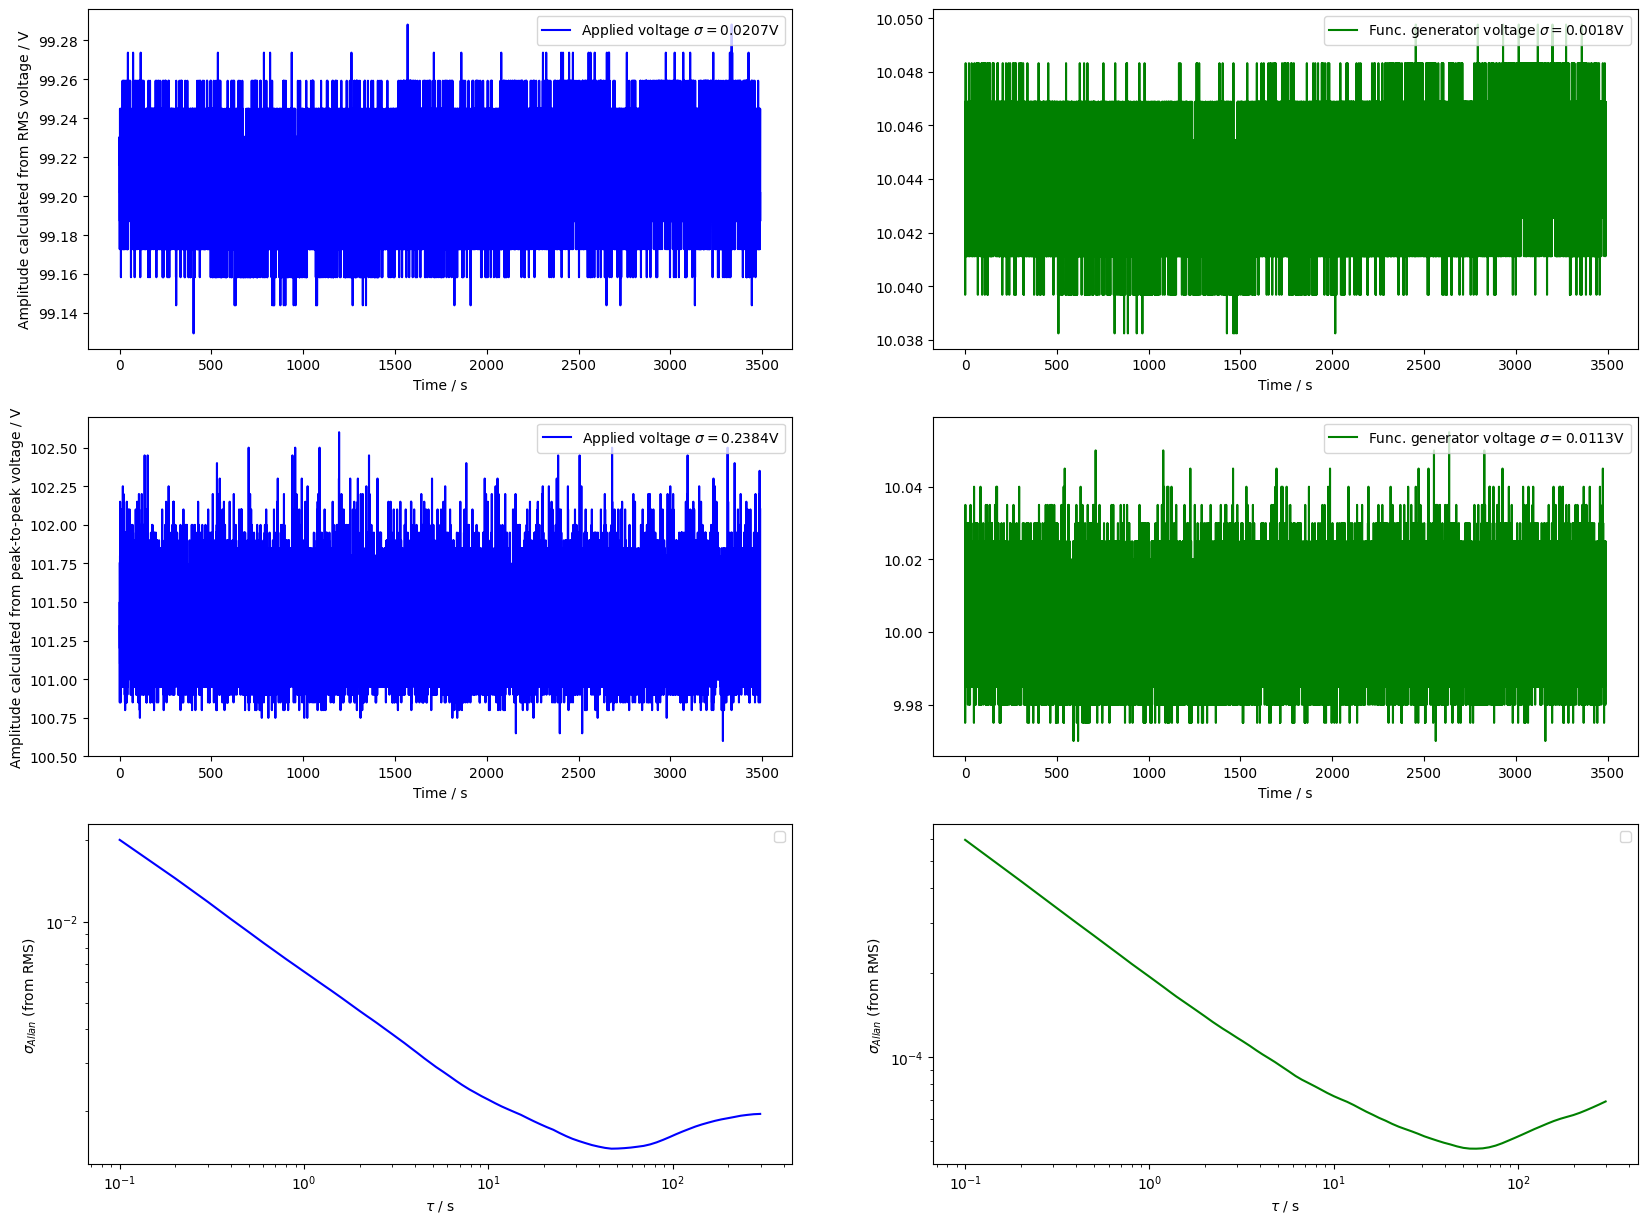

In [3]:
data100V = data100V[10001:,:]
make_stab_figure(data100V)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 2000x1500 with 6 Axes>,
 array([[<Axes: xlabel='Time / s', ylabel='Amplitude calculated from RMS voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='Time / s', ylabel='Amplitude calculated from peak-to-peak voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>,
         <Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>]],
       dtype=object))

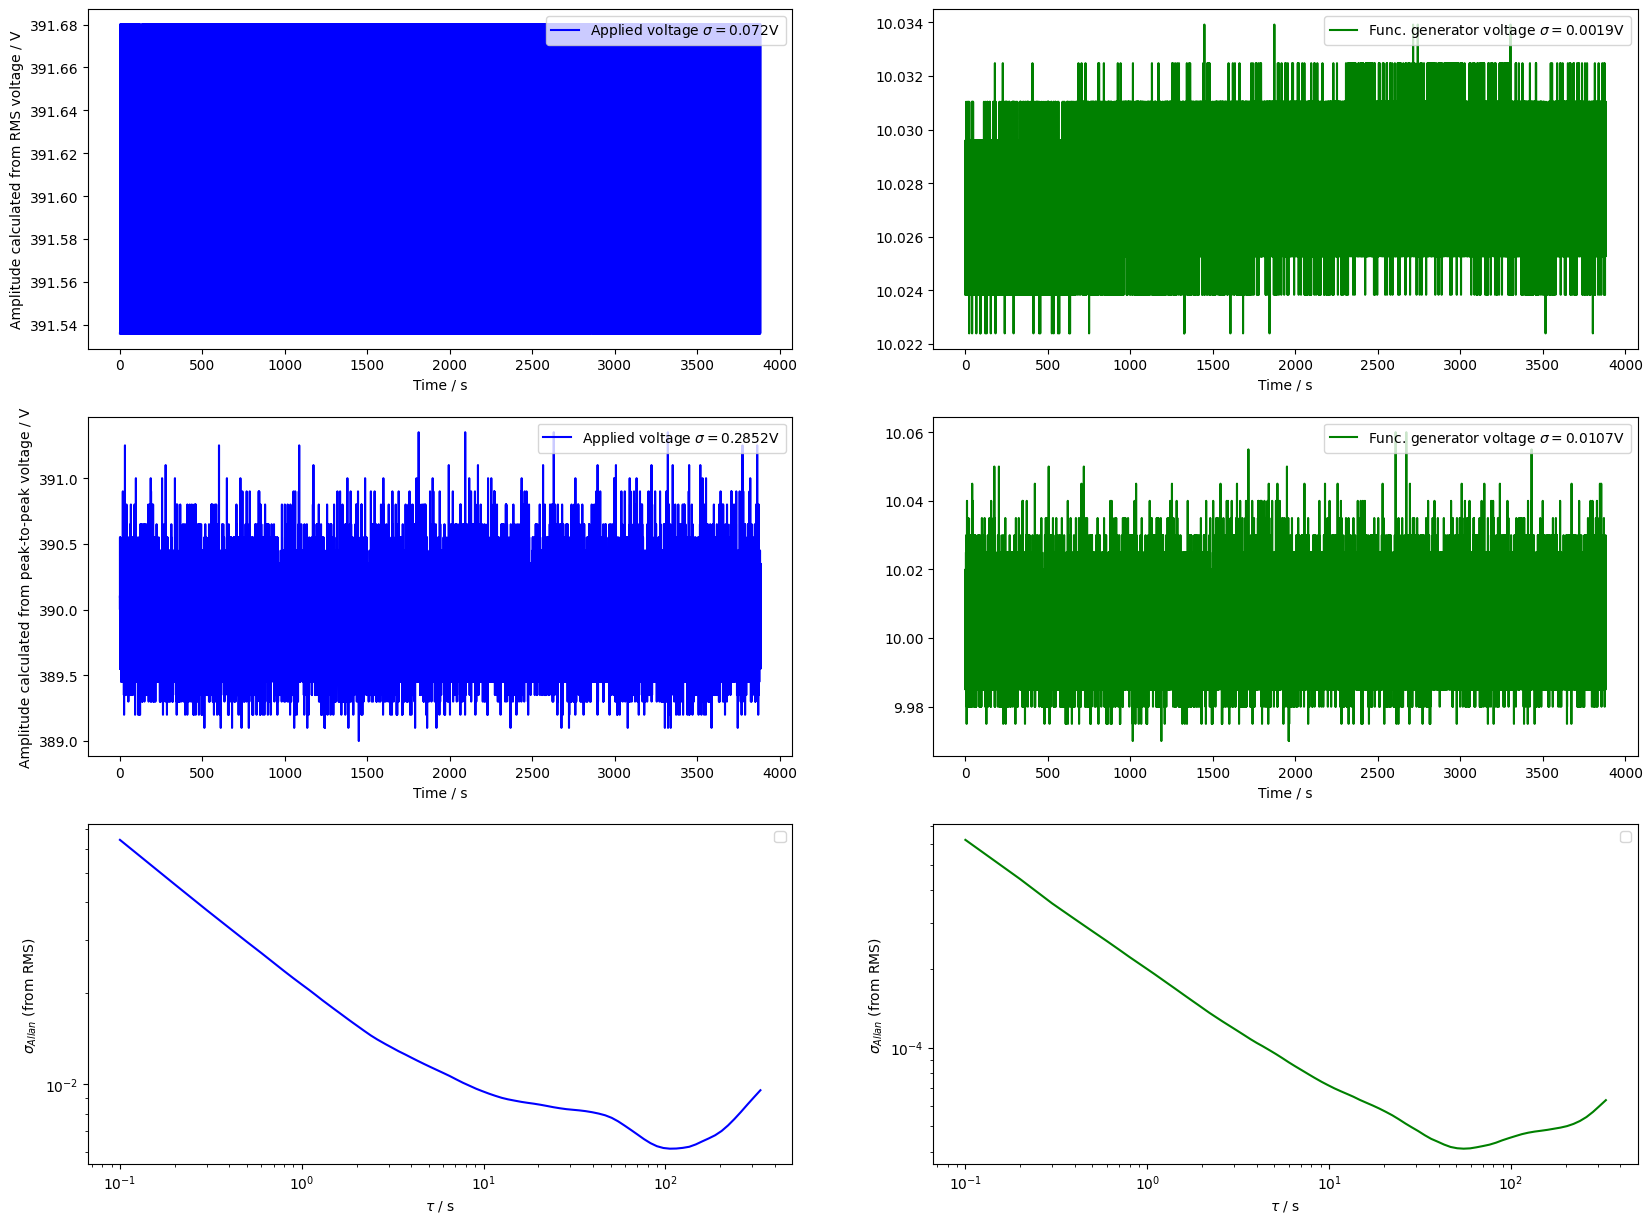

In [4]:
data400V = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\scope_log_20241002_RFStab_400V_.txt',skiprows = 1,delimiter = ',')

make_stab_figure(data400V)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 2000x1500 with 6 Axes>,
 array([[<Axes: xlabel='Time / s', ylabel='Amplitude calculated from RMS voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='Time / s', ylabel='Amplitude calculated from peak-to-peak voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>,
         <Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>]],
       dtype=object))

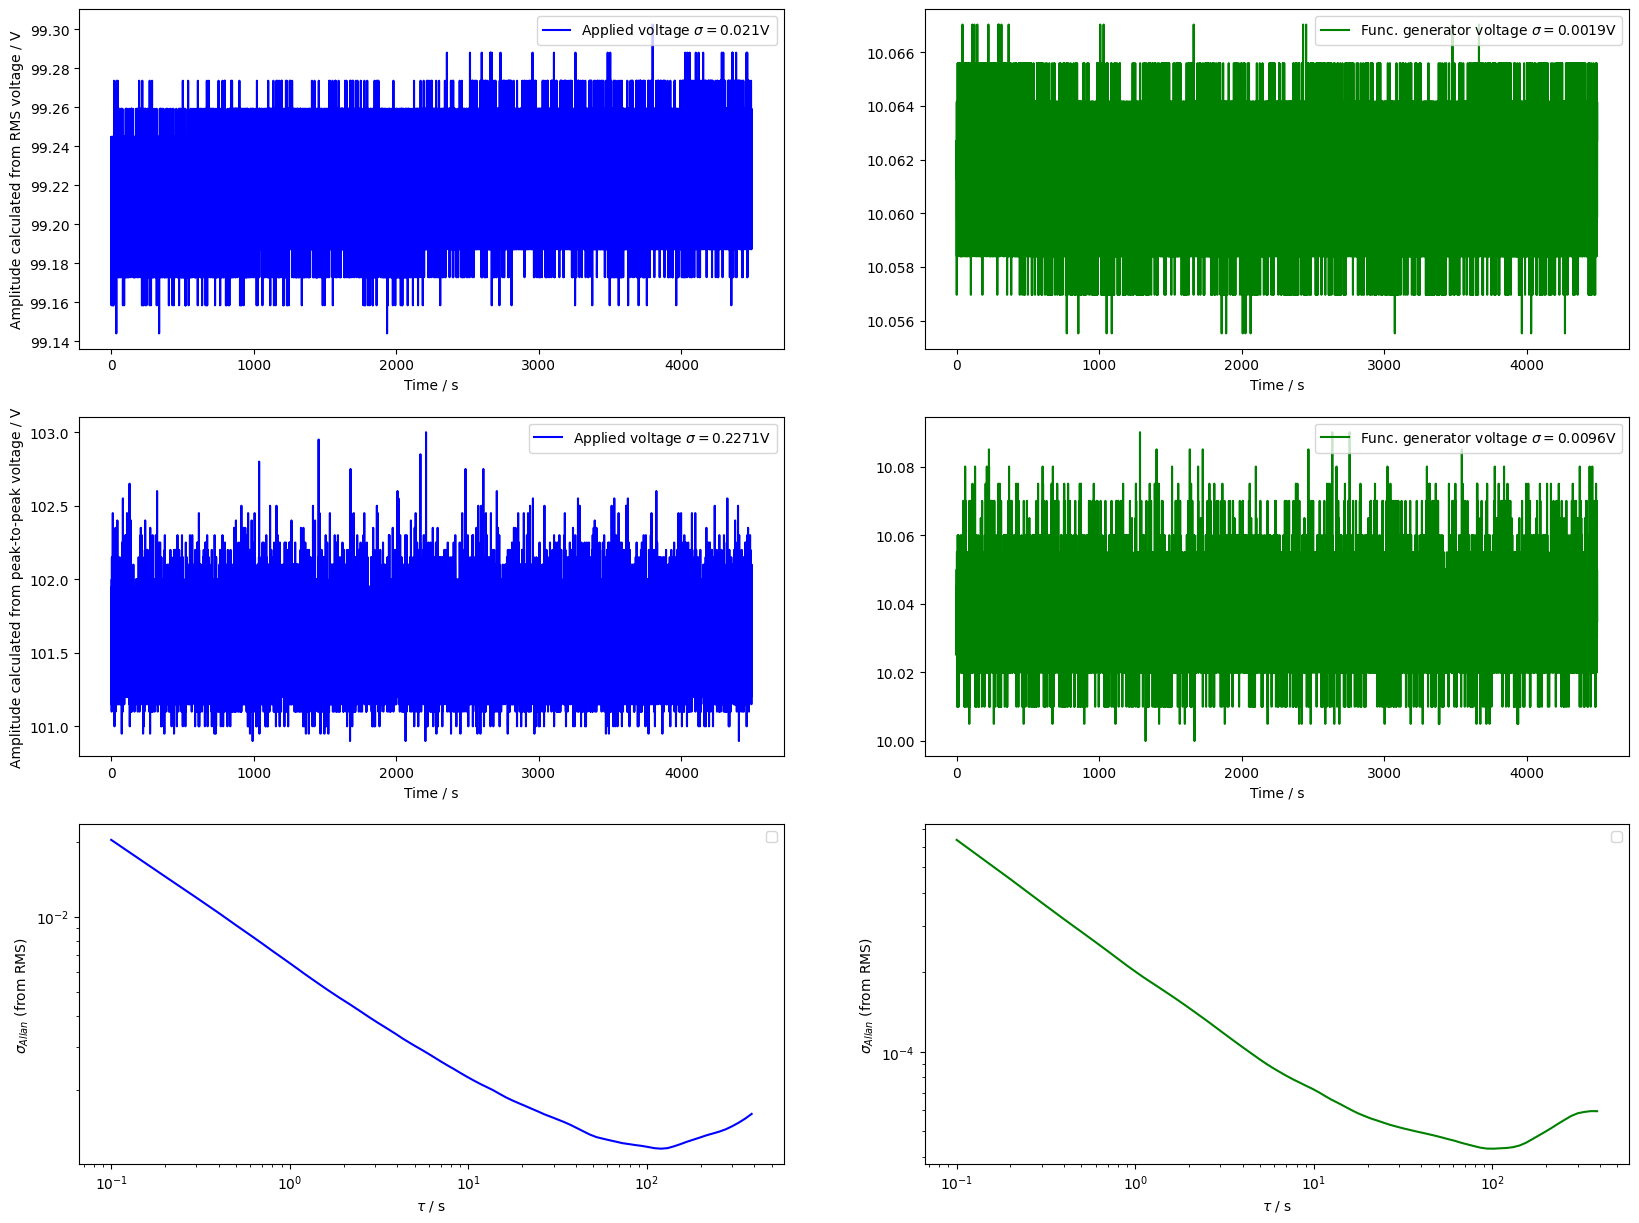

In [5]:
data100V_v2 =  np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\scope_log_20241002_RFStab_100V_v2_.txt',skiprows = 1,delimiter = ',')

make_stab_figure(data100V_v2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 2000x1500 with 6 Axes>,
 array([[<Axes: xlabel='Time / s', ylabel='Amplitude calculated from RMS voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='Time / s', ylabel='Amplitude calculated from peak-to-peak voltage / V'>,
         <Axes: xlabel='Time / s'>],
        [<Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>,
         <Axes: xlabel='$\\tau$ / s', ylabel='$\\sigma_{Allan}$ (from RMS)'>]],
       dtype=object))

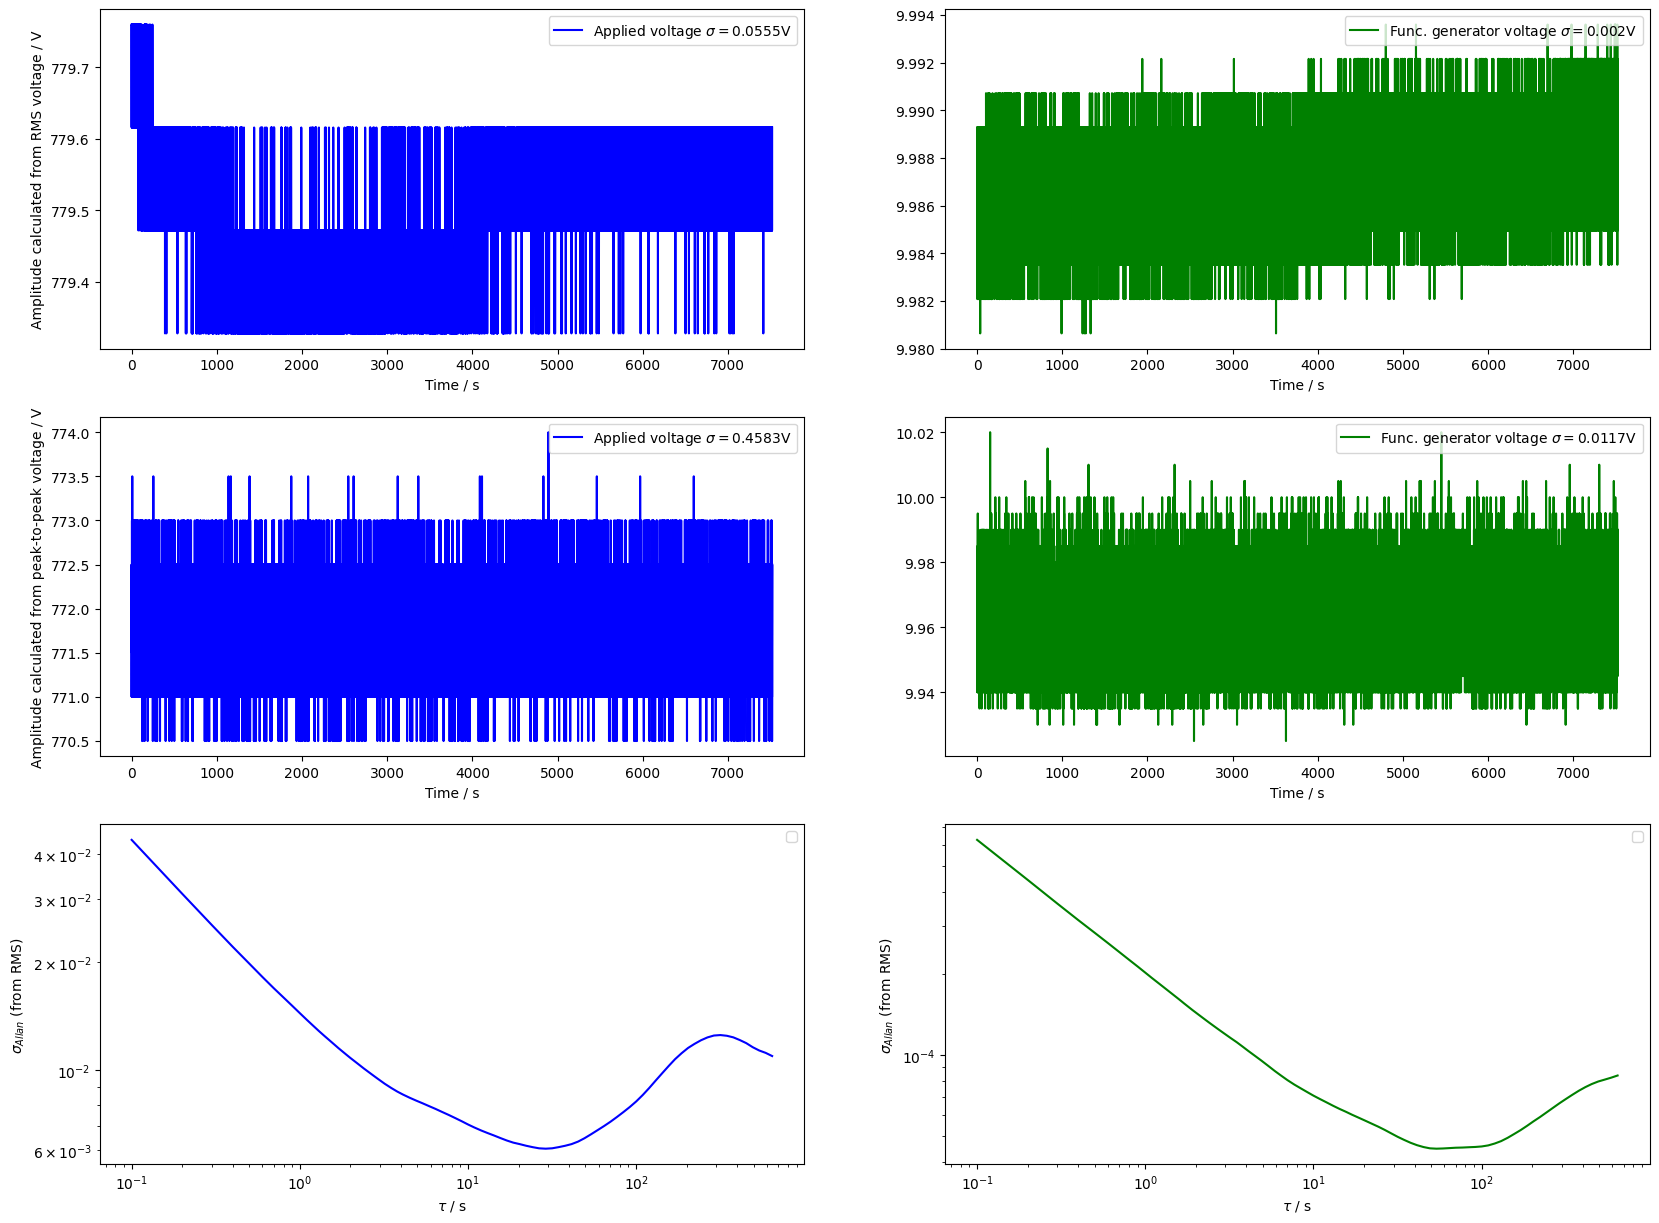

In [6]:
data800V = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\scope_log_20241002_RFStab_800V_.txt',skiprows = 1,delimiter = ',')

make_stab_figure(data800V)

In [7]:
scope800V = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\rf800v0.csv',delimiter=',',skiprows = 1,usecols=(0,1))
scope100V = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\rf100v0.csv',delimiter=',',skiprows = 1,usecols=(0,1))
scope400V = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\RF Stability Measurements\rf400v0.csv',delimiter=',',skiprows = 1,usecols=(0,1))

dt is  1.0000000000157452 ns


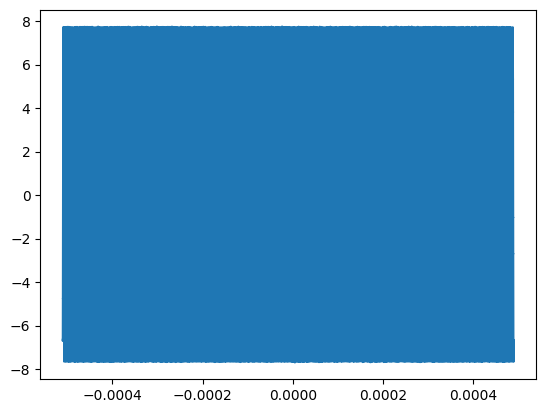

In [17]:
plt.plot(scope800V[:,0],scope800V[:,1])
# plt.xlim(0,100*1e-7)
print('dt is ', (scope800V[1,0]-scope800V[0,0])*1e9, 'ns')

In [23]:
def dbV_plot(dataset):
    ts = dataset[:,0]
    Vs = dataset[:,1]
    FFTVs = scipy.fft.fft(Vs)
    fig,ax = plt.subplots()
    N = len(ts)
    print((ts[-1]-ts[0])/10)
    freqs = scipy.fft.fftfreq(N,d = ts[1]-ts[0])
    mask = freqs>0
    refpow = np.max(np.sqrt(2)*np.abs(FFTVs[mask])/N)
    ax.plot(freqs[mask]*1e-3,20*np.log10(np.sqrt(2)*np.abs(FFTVs[mask])/N/refpow))
    ax.set_xlim(0,1.9*1e3)
    ax.set_xlabel('Frequency / kHz')
    ax.set_ylabel('Monitor Voltage / dB relative to peak')
    ax.set_xticks([300,600,900,1200,1500,1800])
    return fig,ax

9.999990000000001e-05


Text(0.5, 0.98, 'FFT Amplitude spectrum at 100V')

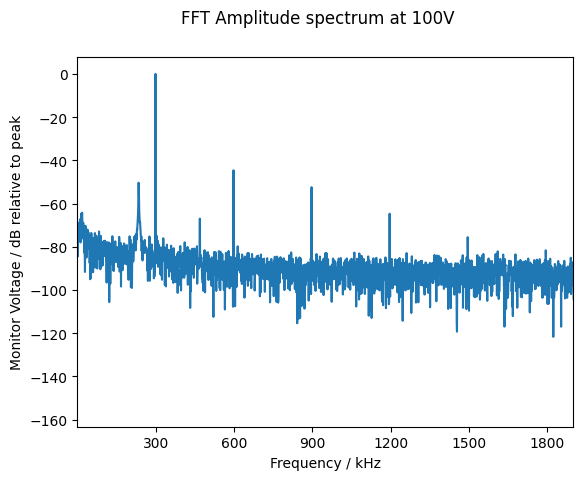

In [24]:
fig100,ax100 = dbV_plot(scope100V)
fig100.suptitle('FFT Amplitude spectrum at 100V')


9.999990000000001e-05


(290.0, 310.0)

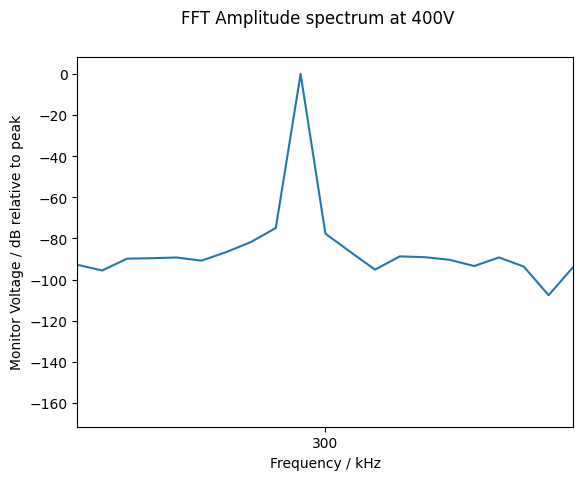

In [31]:
fig400,ax400 = dbV_plot(scope400V)
fig400.suptitle('FFT Amplitude spectrum at 400V')
ax400.set_xlim(290,310)

9.999990000000001e-05


Text(0.5, 0.98, 'FFT Amplitude spectrum at 800V')

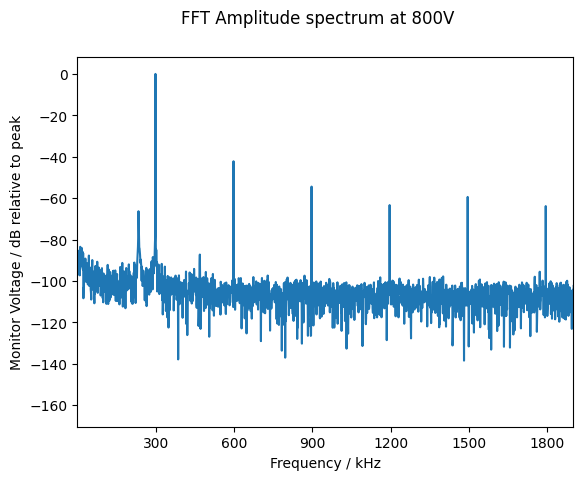

In [32]:
fig800,ax800 = dbV_plot(scope800V)
fig800.suptitle('FFT Amplitude spectrum at 800V')

In [102]:
def rollingRMS(xs,ys,windowLength):
    #Do a rolling window RMS calculation with a window of 'window' indexes length.
    N = len(xs)

    #Number of windows that fit within the length of the data.
    mean_x = []
    RMS_y = []
    for j in range(N-windowLength):
        start = j
        end = j+windowLength
        window_y = ys[start:end]
        window_x = xs[start:end]
        mean_x.append(np.mean(window_x))
        RMS_y.append(np.sqrt(np.sum(window_y**2)/windowLength))
    return np.array(mean_x), np.array(RMS_y)
t_mean100,VRMS100 = rollingRMS(scope100V[:,0]-scope100V[0,0],scope100V[:,1],3344)
t_mean400,VRMS400 = rollingRMS(scope400V[:,0]-scope400V[0,0],scope400V[:,1],3344)
t_mean800,VRMS800 = rollingRMS(scope800V[:,0]-scope800V[0,0],scope800V[:,1],3344)


Text(0.5, 1.0, 'Short-term Allan deviation at 100V')

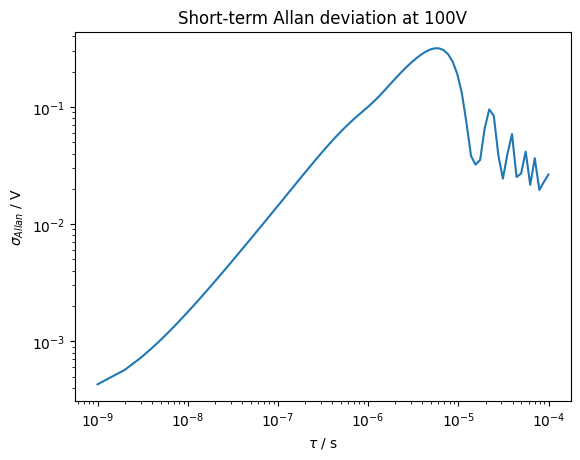

In [107]:
tau100,avar100 = av.compute_avar(VRMS100,1e-9)
plt.plot(tau100,144*np.sqrt(avar100))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\tau$ / s')
plt.ylabel(r'$\sigma_{Allan}$ / V')
plt.title('Short-term Allan deviation at 100V')

Text(0.5, 1.0, 'Short-term Allan deviation at 400V')

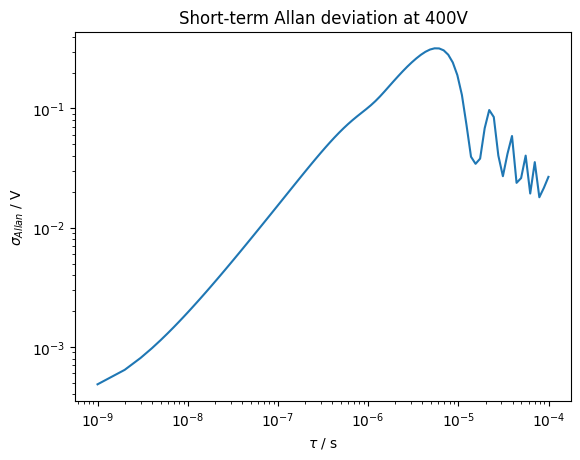

In [108]:
tau400,avar400 = av.compute_avar(VRMS400,1e-9)
plt.plot(tau400,144*np.sqrt(avar400))
plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\tau$ / s')
plt.ylabel(r'$\sigma_{Allan}$ / V')
plt.title('Short-term Allan deviation at 400V')

Text(0.5, 1.0, 'Short-term Allan deviation at 800V')

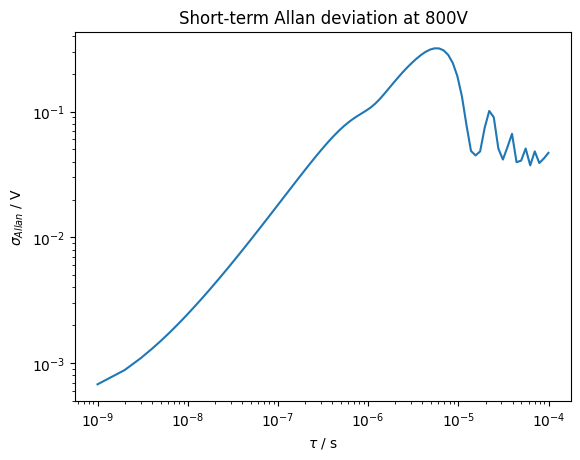

In [109]:
tau800,avar800 = av.compute_avar(VRMS800,1e-9)
plt.plot(tau800,144*np.sqrt(avar800))

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\tau$ / s')
plt.ylabel(r'$\sigma_{Allan}$ / V')
plt.title('Short-term Allan deviation at 800V')